# Rock Scissor Paper toy project
AIFFEL 대전 탐색 노드 1   
가위바위보 게임에서 webcam으로 찍은 사람 손 모양(가위, 바위, 보) 사진을 분류하는 프로젝트이다.   
프로세스는 다음과 같다.
0. Import package
1. Image preprocessing
2. Load data
3. Sampling
4. Make model
5. Evaluate model

## 0. Import package

In [1]:
#Task : make image classification for "rock scissor paper" on webcam
#import package for project image classification
import tensorflow
from tensorflow import keras
import numpy as np

In [2]:
#import package for image processing
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


## 1. Image preprocessing (resize)
이미지 사이즈를 28*28로 down sampling 한다.(아마도 계산량 절감 목적인 것 같다.(교육용이니까))

In [3]:
#path setting & name setting
image_dir_path = ["./scissor", "./rock", "./paper"]
data_name = ["가위","바위","보"]

# resize 28*28 for all images
for i in range(0,3):
    print("이미지 ", data_name[i], " 디렉토리 경로: ", image_dir_path[i])
    images=glob.glob(image_dir_path[i] + "/*.jpg")  
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img,"JPEG")

    print(data_name[i], " 이미지 resize 완료!")
    


이미지  가위  디렉토리 경로:  ./scissor
가위  이미지 resize 완료!
이미지  바위  디렉토리 경로:  ./rock
바위  이미지 resize 완료!
이미지  보  디렉토리 경로:  ./paper
보  이미지 resize 완료!


## 2. Load data
Train data와 test data는 다른 디렉토리로 분류하였고,   
각각 5100, 1200개로 정확히 가위 바위 보 비율이 같다.(1:1:1)   
한 사람당 300개(가위 100, 바위 100, 보 100)이므로 17명과 4명으로 분류한 데이터이다.   
성능평가에 신뢰성을 높이기 위해서 train, test data에 같은 사람이 만든 데이터가 동시에 들어가지 않도록 하였다.   
즉, test data는 train 과정에서 학습이 안된 다른 환경의 데이터이다.

### 2-1 Train data

In [4]:
#define data loading
def load_data():
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=5100
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)
    
    idx=0
    for file in glob.iglob('./scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob('./rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob('./paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

(x_train, y_train)=load_data()
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 5100 입니다.
x_train shape: (5100, 28, 28, 3)
y_train shape: (5100,)


### 2-2 Test data 

In [5]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
# 경로 설정만 차이가 있음

def load_test_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=1200
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)
    
    idx=0
    for file in glob.iglob(img_path+'scissor0/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'rock0/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'paper0/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = "./test/"
x_test,y_test = load_test_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))


학습데이터(x_test)의 이미지 개수는 1200 입니다.
x_test shape: (1200, 28, 28, 3)
y_test shape: (1200,)


## 3. Sampling
데이터의 확인하기 위한 것이다.

라벨:  0


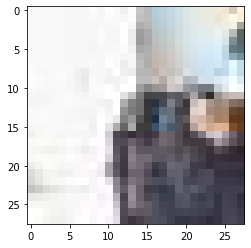

In [6]:
# check the train data
import matplotlib.pyplot as plt
plt.imshow(x_train[2])
print('라벨: ', y_train[2])

라벨:  0


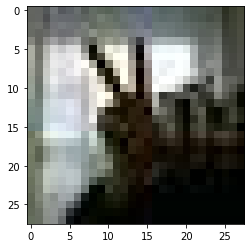

In [7]:
# check the test data
plt.imshow(x_test[1])
print('라벨: ', y_test[1])

## 4. Make Model
이미지의 크기는 mnist와 같고 색깔(채널 수)만 다르므로 모델을 생성할 때,   
mnist 예제 기반에서 약간 더 복잡하게 만들었다.(conv layer 부분 추가)   
구체적으로는 conv+pooling layer을 하나 더 쌓았고, conv layer에 padding을 추가 시켜 좀 더 많이 고려할 수 있도록 하였다.

In [8]:
#hyperparameter
n_channel_1=32
n_channel_2=64
n_channel_3=128

n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), padding="same", activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), padding="same", activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), padding="same", activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
#summary -> model structure

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

## 5. Train Model

In [9]:
# optimizer: adam, loss: cross_entropy
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

Epoch 1/10
160/160 [==============================] - 1s 9ms/step - loss: 0.9293 - accuracy: 0.5151
Epoch 2/10
160/160 [==============================] - 1s 8ms/step - loss: 0.4063 - accuracy: 0.8469
Epoch 3/10
160/160 [==============================] - 1s 8ms/step - loss: 0.2134 - accuracy: 0.9255
Epoch 4/10
160/160 [==============================] - 1s 8ms/step - loss: 0.1122 - accuracy: 0.9661
Epoch 5/10
160/160 [==============================] - 1s 8ms/step - loss: 0.0545 - accuracy: 0.9839
Epoch 6/10
160/160 [==============================] - 1s 9ms/step - loss: 0.0391 - accuracy: 0.9888
Epoch 7/10
160/160 [==============================] - 1s 9ms/step - loss: 0.0357 - accuracy: 0.9912
Epoch 8/10
160/160 [==============================] - 1s 8ms/step - loss: 0.0294 - accuracy: 0.9918
Epoch 9/10
160/160 [==============================] - 1s 8ms/step - loss: 0.0103 - accuracy: 0.9980
Epoch 10/10
160/160 [==============================] - 1s 9ms/step - loss: 0.0087 - accuracy: 0.9973

## 6. Evaluate Model

In [10]:
# evalutation
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))    

38/38 - 0s - loss: 1.8948 - accuracy: 0.6883
test_loss: 1.8948464393615723 
test_accuracy: 0.6883333325386047


## 회고 및 루브릭 평가

### 루브릭 평가 항목
1. 이미지 분류기 모델이 성공적으로 만들어졌는가(트레이닝이 정상적으로 수행되었음)?
    
2. 오버피팅을 극복하기 위한 적절한 시도가 있었는가(데이터셋의 다양성, 정규화 등의 시도가 적절하였음)?

3. 분류모델의 test accuracy가 기준 이상 높게 나왔는가(60% 이상 도달하였음)?

### 평가 항목에 대한 수행
1. make model에서 모델을 구성하였고, train model에서 트레이닝이 정상적으로 수행되었다.
2. 오버피팅을 극복하기 위하여 기존 300개의 데이터 셋에서 train data를 5,100개까지 모으고, 이미지 데이터를 255로 나누어주는 정규화도 진행을 하였다.
3. evaluate model에서 정확도가 60%이상이였다.(68.8%)

### 회고

노션에 공지된 꼭 포함이 되어야 할 점
- 이번 프로젝트에서 **어려웠던 점,**
- 프로젝트를 진행하면서 **알아낸 점** 혹은 **아직 모호한 점**.
- 루브릭 평가 지표를 맞추기 위해 **시도한 것들**.
- 만약에 루브릭 평가 관련 지표를 **달성 하지 못했을 때, 이유에 관한 추정**.
- **자기 다짐**

---
- **어려웠던 점** 프로젝트에 어려웠던 점은 (신뢰성 있는) 성능 높이기 였다. 탐색 노드에 따르면 300개의 훈련 셋을 이용하여 테스트를 하는데 대부분 성능이 안 좋았다.(아마 평균 33%였던 것 같다.) 특정한 테스트 케이스에 대해서는 100% 정확도를 보인 것도 있었지만 그렇게 제출하기에는 양심이 거부했다. 그래서 테스트 케이스를 여러 사람이 포함된 것으로 하였고, 훈련 셋 300개로는 성능을 높이기가 정말 힘들었다.(이 부분이 왜 제목으로 표시 되는지 이해가 가지 않는다. 로컬에서 정상적으로 단순한 텍스트로 표시된다.) 
---
- **알아낸 점** 먼저 알아낸 점은 기본 모델(탐색 노드에서 MNIST 훈련시킨 모델)을 크게 바꾸지 않고도 훈련 데이터에 대해서는 빠르게 잘 훈련한다.(20이내 epoch에 epoch당 5초 이내에 정확도 100%에 수렴한다.) 하지만 테스트 데이터의 성능은 낮다.(오버피팅) 그리고 머신러닝(딥러닝)은 역시 데이터가 많으면 대부분의 문제가 해결된다는 것이다. 여기서는 오버피팅 문제가 해결 되었다.(정확도가 33%에서 60%까지 훈련 데이터를 늘릴수록 증가하였다.)
- **모호한 점** 모호한 점은 탐색 노드에서 300개 데이터만 사용하여 훈련을 진행했는데 과연 데이터 추가 없이 정확도가 루브릭 기준인 60%을 넘을 수 있는지에 대한 것이 의문이다. 그리고 이미지에 대해서 다운 샘플링(resize)를 진행했는데 내가 예상한 계산량을 줄이기 위한 의도 였는지 의문이 든다. 
---
- **시도한 것들** 훈련 데이터의 개수를 늘리고 평가의 신뢰성을 높이기 위해서 테스트 데이터도 역시 늘렸다. 또한 MNIST 모델에서 조금의 수정를 하였고 좋은 구조를 찾기 위해서 노력하였다. 좋은 하이퍼 파라미터를 찾기 위해서 랜덤 서치를 사용했다. 좋은 모델을 자동적으로 찾기 위해서 모델을 저장하는 코드를 넣었다.(이 부분이 왜 제목으로 표시 되는지 이해가 가지 않는다. 로컬에서 정상적으로 단순한 텍스트로 표시된다.)  
---
- **우브릭 평가 관련 지표** 제 예상에는 모두 달성되었다고 생각한다. 그 이유는 위에 있는 **평가 항목에 대한 수행**에 나와있다.
- **자기 다짐** 및 **나의 생각들**      
먼저 300개의 데이터로 60% 이상의 정확도를 가진 모델이 있는지 정말 궁금하다.(특정 테스트 데이터가 아닌 여러 사람의 평균적 정확도) 이 프로젝트를 하면서 데이터의 중요성을 다시 한 번 느끼는 경험이 되었다. 이미지의 크기가 작아서 실험한 모델의 대부분에 대해서 오버피팅이 되어서 좋은 모델을 찾기가 매우 어려웠다. 진짜 이상하게 만들지만 않으면 모두 훈련 데이터에 대해서 정확도가 100%에 수렴하게 된다. 그래서 훈련 데이터로는 이 모델이 좋은 지 짐작조차 할 수 없어서 많이 힘들었다.(대부분에 모델에 대해서 같은 수렴 값을 보이기 때문에 다른 점을 보려면 결국 테스트 데이터로 평가해야 한다.) 결국 데이터를 모으는 것이 가장 빠른 길이라고 생각했고, 데이터 수집(노가다)을 거쳐 약 5000개의 훈련 데이터를 모으고 데이터 평가의 신뢰성을 높이기 위해서 1200개의 테스트 데이터에 대해서 평가를 했다. 여기에는 나타나지 않지만 결과 분석을 위해서 테스트 4명분의 데이터는 각각마다 정확도를 측정했고, 정확도가 왜 낮게 나오는 지 살펴본 결과, 훈련 데이터와 차이가 많이 나는 이미지임을 확인했고, 데이터를 더 많이 모아서 성능을 높였다. 이 과정에서 훈련 데이터를 한 번에 모은 것이 아니라 순차적으로 모으고 실험하고 하는 과정의 반복을 하여서 생각보다 시간이 많이 걸렸다. 앞으로는 한 번에 데이터를 모아서 모델을 실험 평가하는 계획을 하는 것이 더 좋을 것 같다.
하이퍼 파라미터 찾는 과정은 밑에 코드로 남겼다.(찾는 과정에서 저장된 모델은 많지만 좋은 거 몇 가지만 코드로 소개하겠다.)
마지막으로 테스트 데이터가 하는 역할이 마치 검증 데이터가 하는 역할 같아서 느낌이 이상했다.


### 하이퍼 파라미터 랜덤 서치
성능이 60% 넘으면 바로 종료하기 때문에 70%을 넘는 성능을 찾지는 못했다.

In [ ]:
### 성능 높이기 루프(좋은 하이퍼 파라미터 찾기)
### 명시되어 있는 파라미터 뿐만 아니라 랜덤으로 미니 배치를 결정하고 초기화되는 것까지 고려하기 위해서
### 무한 루프를 돌렸다. 
### 단, 오래 돌리면 컴퓨터를 강제 종료해야 할 수 있으니 주의(모델을 계속 새롭게 만들다보니 메모리 문제인 것 같다.)
### 실제로 한 번 컴퓨터를 강제 종료 시켰다.
import random
final_acc = 0.0
while 1:
    #바꿔 볼 수 있는 하이퍼파라미터들
    #hyperparameter tuning by random search
    hyp_list = [16,32,64,128]
    n_channel_1 = random.choice(hyp_list)
    n_channel_2 = random.choice(hyp_list)
    n_channel_3 = random.choice(hyp_list)

    n_dense = random.choice(hyp_list)
    n_train_epoch=10

    model=keras.models.Sequential()
    model.add(keras.layers.Conv2D(n_channel_1, (3,3), padding="same", activation='relu', input_shape=(28,28,3)))
    model.add(keras.layers.MaxPool2D(2,2))
    model.add(keras.layers.Conv2D(n_channel_2, (3,3), padding="same", activation='relu'))
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Conv2D(n_channel_3, (3,3), padding="same", activation='relu'))
    model.add(keras.layers.MaxPooling2D((2,2)))
    
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(n_dense, activation='relu'))
    model.add(keras.layers.Dense(3, activation='softmax'))

    #model.summary()
    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

    # 모델 훈련
    model.fit(x_train_norm, y_train, epochs=n_train_epoch, verbose=0)
    # 모델 시험
    acc = 0.0
    test_loss, acc = model.evaluate(x_test_norm, y_test, verbose=2)
    if final_acc < acc:
        final_acc = acc
        model.save("model_name.h5")
    if final_acc > 2.4: #성능이 60%가 넘으면 종료 ㅎㅎ
        break
    print(final_acc)

In [11]:
# 좋은 성능 모델의 예시 (60% 이상)
re_model = keras.models.load_model("RSP.h5")
re_model.summary()
test_loss, test_accuracy = re_model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 32)                51232     
_________________________________________________________________
dense_33 (Dense)             (None, 3)               

In [13]:
# 좋은 성능 모델의 예시 (60% 이상)
final_model = keras.models.load_model("RSP_final.h5")
test_loss, test_accuracy = final_model.evaluate(x_test_norm, y_test, verbose=2)
final_model.summary()
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

38/38 - 0s - loss: 1.4844 - accuracy: 0.6517
Model: "sequential_207"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_622 (Conv2D)          (None, 28, 28, 128)       3584      
_________________________________________________________________
max_pooling2d_621 (MaxPoolin (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_623 (Conv2D)          (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_622 (MaxPoolin (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_624 (Conv2D)          (None, 7, 7, 32)          18464     
_________________________________________________________________
max_pooling2d_623 (MaxPoolin (None, 3, 3, 32)          0         
_________________________________________________________________
flatten